In [43]:
setwd('~/exercise/TimeSeries/PracticeTs/')
# read data to R variable
birth.data<-read.csv("dataset/daily-total-female-births-in-cal.csv")

In [44]:
typeof(birth.data)
dim(birth.data)
birth.data[c(1:3),c(1:2)]

[1] "list"

[1] 365   2

,Date,Daily.total.female.births.in.California..1959
,<fct>,<int>
1,1959-01-01,35
2,1959-01-02,32
3,1959-01-03,30


In [45]:
# use date format for dates
birth.data$Date <- as.Date(birth.data$Date, "%Y-%m-%d")

In [47]:
head(birth.data,3)

,Date,Daily.total.female.births.in.California..1959
,<date>,<int>
1,1959-01-01,35
2,1959-01-02,32
3,1959-01-03,30


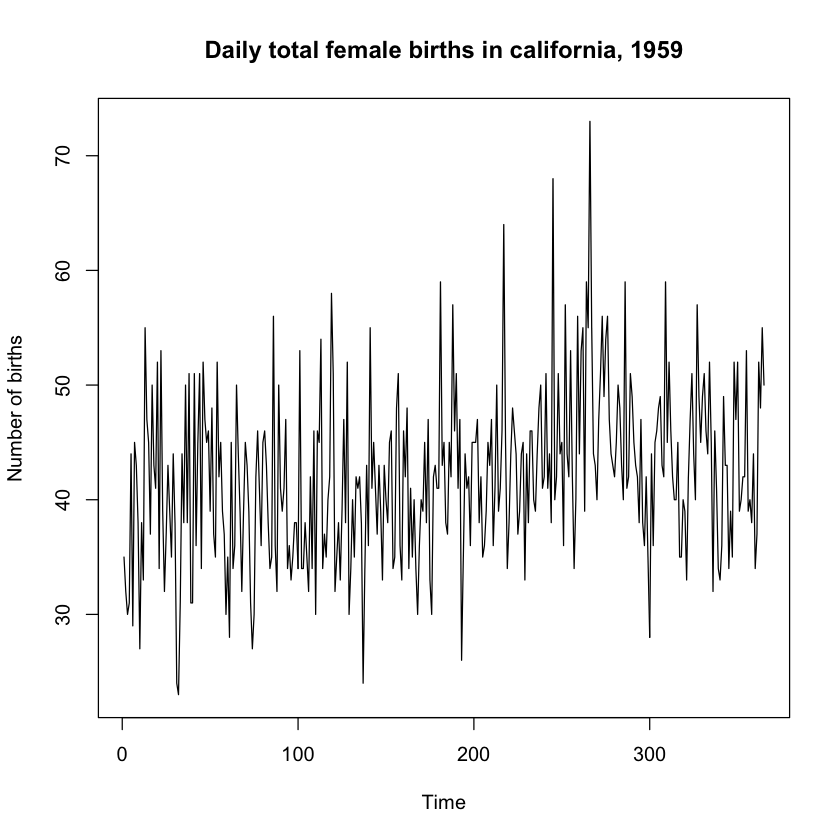

In [49]:
# pull out number of births column
number_of_births<-birth.data$Daily.total.female.births.in.California..1959
plot.ts(number_of_births,main='Daily total female births in california, 1959', ylab = 'Number of births')

Use __Ljungand Box__   

as a test statistic for the null hypothesis  
__𝐻0:𝜌1=𝜌2=⋯=𝜌𝑚=0__  
in other word, there is no autocorrelation 

We will reject the null hypothesis if the 𝑝-value is sufficiently small  

In [50]:
# Test for correlation
Box.test(number_of_births, lag = log(length(number_of_births)))


	Box-Pierce test

data:  number_of_births
X-squared = 36.391, df = 5.8999, p-value = 2.088e-06


p-value is __small enough__, we will reject null hypothesis, there does be some autocorrelation

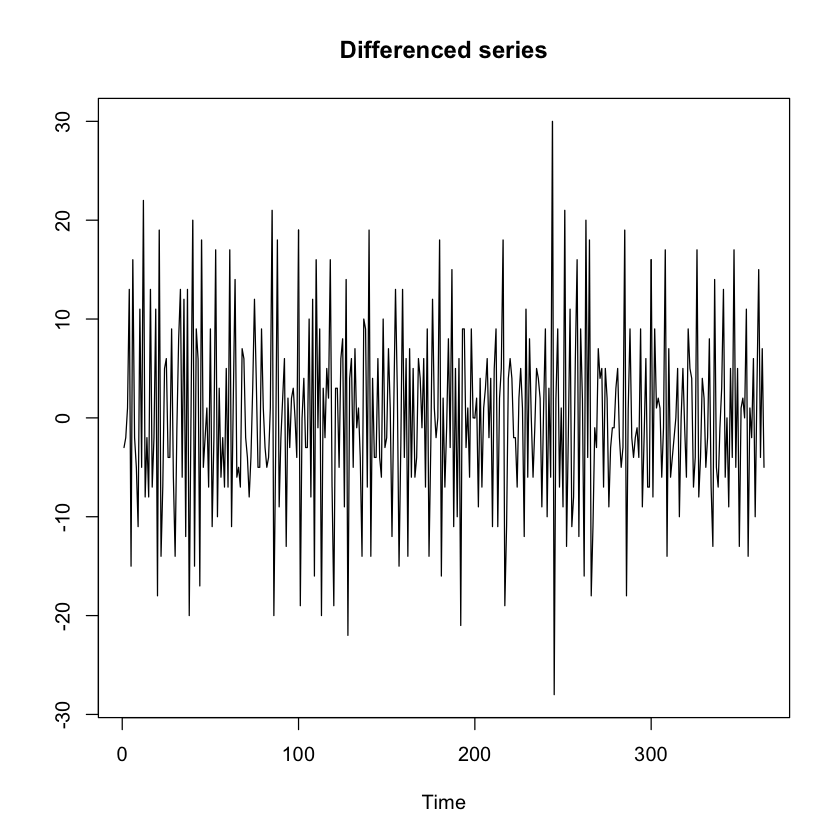

In [51]:
# Plot the differenced data
plot.ts(diff(number_of_births), main='Differenced series', ylab = '')

In [52]:
# Test for correlation in the differenced data
Box.test(diff(number_of_births), lag = log(length(diff(number_of_births))))


	Box-Pierce test

data:  diff(number_of_births)
X-squared = 78.094, df = 5.8972, p-value = 7.661e-15


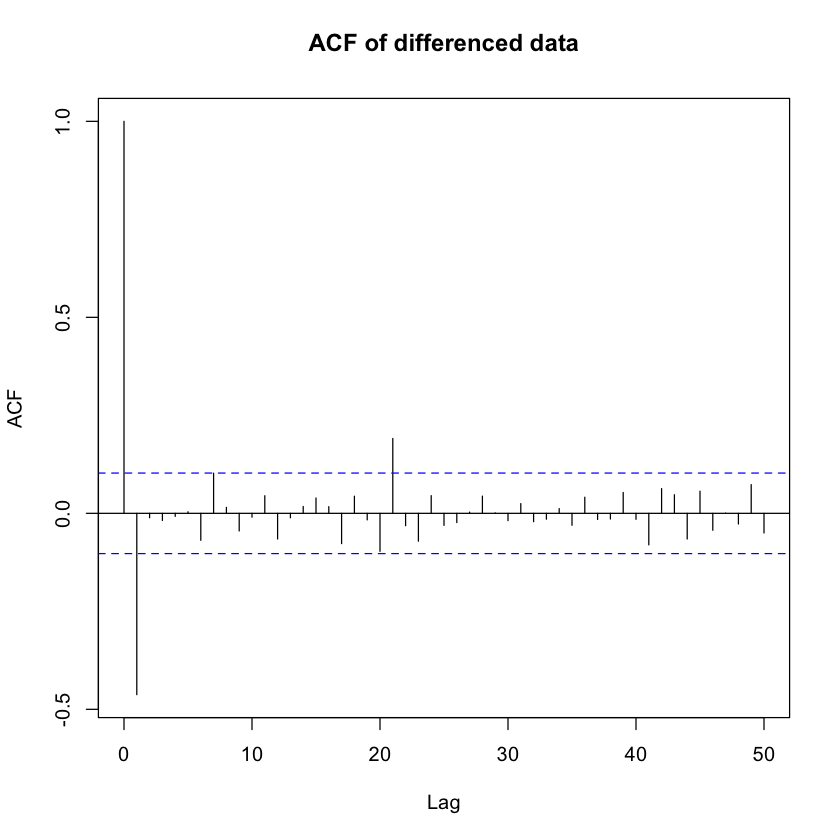

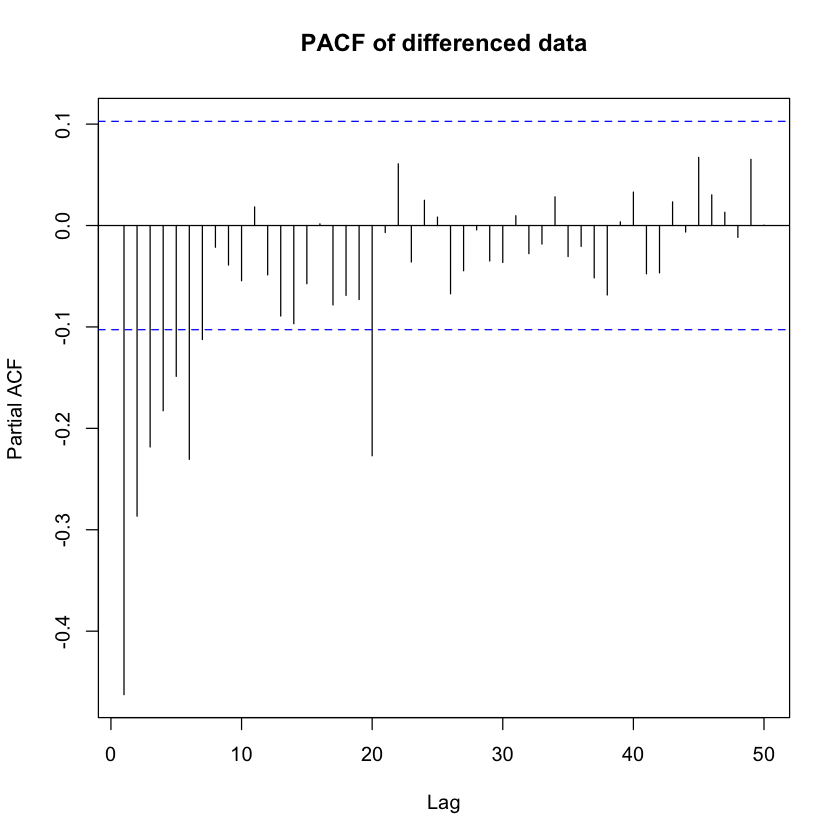

In [53]:
# acf and pacf of the differenced data

acf(diff(number_of_births), main='ACF of differenced data', 50)
pacf(diff(number_of_births), main='PACF of differenced data', 50)

In [54]:
# Fit various ARIMA models


model1<-arima(number_of_births, order=c(0,1,1))
SSE1<-sum(model1$residuals^2)
model1.test<-Box.test(model1$residuals, lag = log(length(model1$residuals)))

model2<-arima(number_of_births, order=c(0,1,2))
SSE2<-sum(model2$residuals^2)
model2.test<-Box.test(model2$residuals, lag = log(length(model2$residuals)))

model3<-arima(number_of_births, order=c(7,1,1))
SSE3<-sum(model3$residuals^2)
model3.test<-Box.test(model3$residuals, lag = log(length(model3$residuals)))

model4<-arima(number_of_births, order=c(7,1,2))
SSE4<-sum(model4$residuals^2)
model4.test<-Box.test(model4$residuals, lag = log(length(model4$residuals)))

df<-data.frame(row.names=c('AIC', 'SSE', 'p-value'), c(model1$aic, SSE1, model1.test$p.value), 
               c(model2$aic, SSE2, model2.test$p.value), c(model3$aic, SSE3, model3.test$p.value),
               c(model4$aic, SSE4, model4.test$p.value))
colnames(df)<-c('Arima(0,1,1)','Arima(0,1,2)', 'Arima(7,1,1)', 'Arima(7,1,2)')



format(df, scientific=FALSE)

,"Arima(0,1,1)","Arima(0,1,2)","Arima(7,1,1)","Arima(7,1,2)"
,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
AIC,2462.2207021,2459.5705306,2464.8827225,2466.6664136
SSE,18148.4561632,17914.6513437,17584.3902548,17574.0578105
p-value,0.5333604,0.9859227,0.9999899,0.9999929


initial  value 2.216721 
iter   2 value 2.047518
iter   3 value 1.974780
iter   4 value 1.966955
iter   5 value 1.958906
iter   6 value 1.952299
iter   7 value 1.951439
iter   8 value 1.950801
iter   9 value 1.950797
iter  10 value 1.950650
iter  11 value 1.950646
iter  12 value 1.950638
iter  13 value 1.950635
iter  13 value 1.950635
iter  13 value 1.950635
final  value 1.950635 
converged
initial  value 1.950708 
iter   2 value 1.950564
iter   3 value 1.950290
iter   4 value 1.950196
iter   5 value 1.950185
iter   6 value 1.950185
iter   7 value 1.950185
iter   7 value 1.950185
iter   7 value 1.950185
final  value 1.950185 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), xreg = constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
          ma1      ma2  constant
      -0.8511  -0.1113     0.015
s.e.   0.0496   0.0502     0.015

sigma^2 estimated as 49.08:  log likelihood = -1226.36,  aic = 2460.72

$degrees_of_freedom
[1] 361

$ttable
         Estimate     SE  t.value p.value
ma1       -0.8511 0.0496 -17.1448  0.0000
ma2       -0.1113 0.0502  -2.2164  0.0273
constant   0.0150 0.0150   1.0007  0.3176

$AIC
[1] 6.760225

$AICc
[1] 6.760408

$BIC
[1] 6.803051


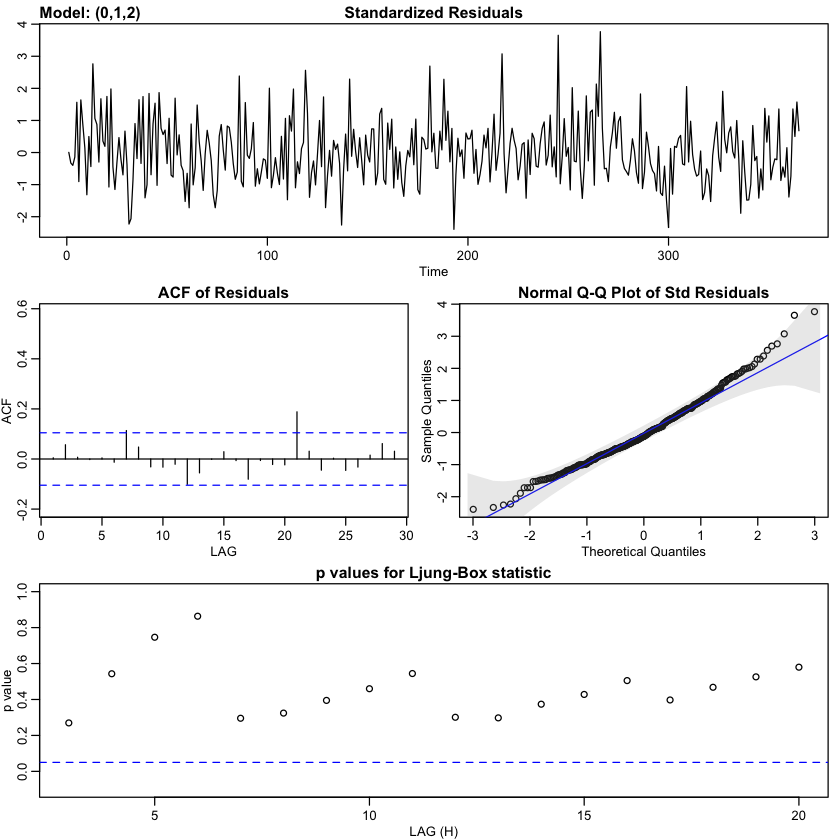

In [56]:
# Fit a SARIMA model
library(astsa)
sarima(number_of_births, 0,1,2,0,0,0)